# Predict and Label Curated Input w/ Model Trained on EMNIST
#### IN PROGRESS, TODO: Describe each step and link to other related projects

## In this third notebook, let's classify our set of unlabeled 28x28 pixel single contour images.

## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image, ImageOps

## Choosing Previously-Trained Classifier

### To swap between loaded models, change the "reloaded_model_name" parameter in the next code block to one of the following four strings:

* __BALANCED__: EMNIST Balanced (131,600 characters - 47 balanced classes)
* __BYCLASS__:  EMNIST ByClass (814,255 characters - 62 unbalanced classes)
* __DIGITS__:   EMNIST Digits (280,000 character - 10 balanced classes)
* __LETTERS__:  EMNIST Letters (145,600 characters - 26 balanced classes)

#### Find more information about the Extended MNIST (EMNIST) dataset here: 
- https://www.nist.gov/itl/products-and-services/emnist-dataset

In [20]:
reloaded_model_name = "LETTERS"
reloaded_model_name_full = "../models/saved-models/emnist-" + reloaded_model_name.lower() + "-saved-model"
reloaded = tf.keras.models.load_model(reloaded_model_name_full)

reloaded.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [21]:
reloaded.layers[0].input_shape

(None, 28, 28, 1)

In [22]:
# example image taken from the "28_png_black_contour_squares" folder
#user_test = "../input/examples/926_contour_square_first_american_financial_413_8.png" # A
user_test = "../input/examples/124_contour_square_loews_255_18.png"  # C
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
#bw = bw.rotate(0)
#bw = ImageOps.mirror(bw)
bw.save("./tmp/bw_image.jpg")
bw

784


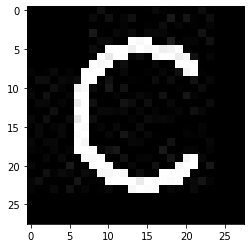

In [23]:
img_array = cv2.imread("./tmp/bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()

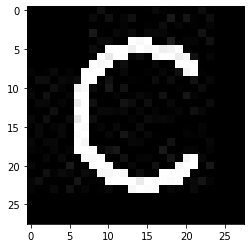

In [24]:
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()

In [25]:
new_array = np.expand_dims(new_array, axis=0)
user_test = tf.keras.utils.normalize(new_array, axis = 1)

In [28]:
balanced_characters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O',
                       'P','Q','R','S','T','U','V','W','X','Y','Z',
                       'a','b','d','e','f','g','h','n','q','r','t']

byclass_characters = ['0','1','2','3','4','5','6','7','8','9',
                      'A','B','C','D','E','F','G','H','I','J','K','L','M',
                      'N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
                      'a','b','c','d','e','f','g','h','i','j','k','l','m',
                      'n','o','p','q','r','s','t','u','v','w','x','y','z']

digits_characters = ['0','1','2','3','4','5','6','7','8','9']

letters_characters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
                      'O','P','Q','R','S','T','U','V','W','X','Y','Z']

characters = letters_characters

if reloaded_model_name == "BALANCED":
    characters = balanced_characters
elif reloaded_model_name == "BYCLASS":
    characters = byclass_characters
elif reloaded_model_name == "DIGITS":
    characters = digits_characters

In [29]:
predicted = reloaded.predict([[user_test]])
a = predicted[0][0]
for i in range(0, len(characters)):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Index is",np.argmax(predicted[0]))
print("The Predicted Value is",characters[np.argmax(predicted[0])])


Probability Distribution for 0 2.9722058e-11
Probability Distribution for 1 0.0003954508
Probability Distribution for 2 0.9768148
Probability Distribution for 3 1.391799e-06
Probability Distribution for 4 9.144076e-06
Probability Distribution for 5 0.00024280534
Probability Distribution for 6 4.181866e-08
Probability Distribution for 7 0.0063467724
Probability Distribution for 8 1.7575514e-05
Probability Distribution for 9 1.9126123e-08
Probability Distribution for 10 1.5804317e-06
Probability Distribution for 11 1.261708e-05
Probability Distribution for 12 1.7429496e-05
Probability Distribution for 13 0.00011174687
Probability Distribution for 14 4.818868e-07
Probability Distribution for 15 9.327958e-06
Probability Distribution for 16 2.5837191e-05
Probability Distribution for 17 0.015272305
Probability Distribution for 18 0.00024243168
Probability Distribution for 19 1.7867531e-05
Probability Distribution for 20 3.0572085e-08
Probability Distribution for 21 2.83828e-05
Probability Di

#### Below is an example of how to save out a model to a .json file to be used on a web app outside of the Jupyter Notebooks environment:

In [18]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(reloaded, "/Users/karabressler/Jupyter Notebooks/emnist-balanced-js-file")